In [1]:
import tensorflow as tf
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

**Load the dataset**

In [3]:
multiclass = pd.read_csv('../../dataset/multiclass_dataset_no_weird_obs.csv',header= 0)

In [4]:
first_split, second_split = train_test_split (multiclass, test_size=403,
                                              train_size=604, random_state=42,
                                              shuffle=True, stratify=None,
)

In [5]:
Training, Test = train_test_split(first_split, train_size = 480,
                                   test_size = 124, random_state=42,
                                   shuffle=True, stratify=None,
)

In [6]:
X_test = np.array(Test.drop(['label','DepMap_ID','Unnamed: 0'], axis = 1))
y_test = pd.get_dummies(Test, columns = ['label']).iloc[:,17395:17404]
X_train = np.array(Training.drop(['label','Unnamed: 0','DepMap_ID'], axis = 1))
y_train = pd.get_dummies(Training, columns = ['label']).iloc[:,17395:17404]

In [7]:
np.shape(X_test)

(124, 17393)

In [8]:
X_train_reshaped = X_train.reshape(480,17393)
X_test_reshaped = X_test.reshape(124,17393)

**First model**

In [9]:
model = Sequential()

model.add(Dense(200, input_shape=(17393,)))
model.add(Activation('relu'))
#model.add(Dropout(0.25))


model.add(Dense(9))
model.add(Activation('softmax'))
#categorical_crossentropy loss per classificazione (penalizza molto le previsioni che sono sbagliate ma con alta probabilità)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy']) #ottimizzatore che usa stochastic gradient , errore assoluto medio

early_stopping_monitor = EarlyStopping(patience= 5, monitor = 'val_accuracy')

model_chekpoint_callback = ModelCheckpoint(filepath='best_model0.hdf5',
                                           monitor = 'val_accuracy',
                                           mode = 'auto',
                                           verbose=1)

hystory = model.fit(X_train_reshaped, y_train,
         validation_data = (X_test_reshaped,y_test),
                    epochs =30,
                   callbacks = (early_stopping_monitor,model_chekpoint_callback))

#in multiclass possiamo aggiungere la softmax come activation function in modo da aumentare la probabilità che solo
#un nodo di uscita venga scelto ogni volta
#se per caso due possibili risultati sono anche parzialmente sovrapponibili si usa come activation function sigmoid

2021-12-05 22:36:22.788495: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-05 22:36:22.789343: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2021-12-05 22:36:23.064993: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-05 22:36:23.068837: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-05 22:36:23.197057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/30
15/15 [==============================] - 1s 19ms/step - loss: 3.7079 - accuracy: 0.1917 - val_loss: 2.0913 - val_accuracy: 0.2500

Epoch 00001: saving model to best_model0.hdf5
Epoch 2/30
 6/15 [===========>..................] - ETA: 0s - loss: 2.1168 - accuracy: 0.2396

2021-12-05 22:36:24.103647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 0s 13ms/step - loss: 1.9769 - accuracy: 0.3083 - val_loss: 1.8609 - val_accuracy: 0.3790

Epoch 00002: saving model to best_model0.hdf5
Epoch 3/30
15/15 [==============================] - 0s 12ms/step - loss: 1.6566 - accuracy: 0.4688 - val_loss: 1.6489 - val_accuracy: 0.4839

Epoch 00003: saving model to best_model0.hdf5
Epoch 4/30
15/15 [==============================] - 0s 13ms/step - loss: 1.4691 - accuracy: 0.5833 - val_loss: 1.6646 - val_accuracy: 0.5242

Epoch 00004: saving model to best_model0.hdf5
Epoch 5/30
15/15 [==============================] - 0s 12ms/step - loss: 1.2692 - accuracy: 0.7125 - val_loss: 1.4582 - val_accuracy: 0.5403

Epoch 00005: saving model to best_model0.hdf5
Epoch 6/30
15/15 [==============================] - 0s 12ms/step - loss: 1.0921 - accuracy: 0.7583 - val_loss: 1.4961 - val_accuracy: 0.4597

Epoch 00006: saving model to best_model0.hdf5
Epoch 7/30
15/15 [==============================] - 0s 12ms/step - loss

**More complex model: increase width and depth**

In [10]:
model = Sequential()

#1°layer
model.add(Dense(600, input_shape=(17393,)))
model.add(Activation('relu'))
#model.add(Dropout(0.25))

#2°layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#3°layer
model.add(Dense(9))
model.add(Activation('softmax'))

#categorical_crossentropy loss per classificazione (penalizza molto le previsioni che sono sbagliate ma con alta probabilità)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy']) #ottimizzatore che usa stochastic gradient , errore assoluto medio

early_stopping_monitor = EarlyStopping(patience= 15, monitor = 'val_accuracy')

model_chekpoint_callback = ModelCheckpoint(filepath='best_model1.hdf5',
                                           monitor = 'val_accuracy',
                                           mode = 'auto',
                                           save_best_only=True,
                                           verbose=1)

hystory = model.fit(X_train_reshaped, y_train,
         validation_data = (X_test_reshaped,y_test),
                    epochs =30,
                   callbacks = (early_stopping_monitor,model_chekpoint_callback))


Epoch 1/30


2021-12-05 22:36:51.313753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 1s 22ms/step - loss: 4.3274 - accuracy: 0.1354 - val_loss: 2.7577 - val_accuracy: 0.1290

Epoch 00001: val_accuracy improved from -inf to 0.12903, saving model to best_model1.hdf5
Epoch 2/30
 1/15 [=>............................] - ETA: 0s - loss: 3.2110 - accuracy: 0.1250

2021-12-05 22:36:51.849587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 0s 18ms/step - loss: 2.3923 - accuracy: 0.2375 - val_loss: 1.8634 - val_accuracy: 0.2823

Epoch 00002: val_accuracy improved from 0.12903 to 0.28226, saving model to best_model1.hdf5
Epoch 3/30
15/15 [==============================] - 0s 17ms/step - loss: 1.8530 - accuracy: 0.3333 - val_loss: 1.6398 - val_accuracy: 0.4758

Epoch 00003: val_accuracy improved from 0.28226 to 0.47581, saving model to best_model1.hdf5
Epoch 4/30
15/15 [==============================] - 0s 17ms/step - loss: 1.4873 - accuracy: 0.5167 - val_loss: 1.5388 - val_accuracy: 0.4435

Epoch 00004: val_accuracy did not improve from 0.47581
Epoch 5/30
15/15 [==============================] - 0s 17ms/step - loss: 1.2119 - accuracy: 0.6208 - val_loss: 1.3658 - val_accuracy: 0.5726

Epoch 00005: val_accuracy improved from 0.47581 to 0.57258, saving model to best_model1.hdf5
Epoch 6/30
15/15 [==============================] - 0s 17ms/step - loss: 0.9113 - accuracy: 0.7313 - val_loss

**Performance on test**

In [11]:
#Create the vectors that contains the Cancers chosen (Cancer_Type2) and the one observed (Cancer_Type)
Cancer_Type = ["Gastrointestinal","Genitals","Muscle-Bone","Neuro","Breast","Head_Neck","Blood",
               "Genitourinary", "Lung"] 


- Eye: 0

- Gastrointestinal: 1

- Genitals: 2

- Muscle-Bone: 3

- Neuro: 4

- Breast: 5

- Head_Neck: 6

- Blood: 7

- Urinario: 8

- Lung: 9

In [12]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                fontsize = 15,
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)

In [13]:
best_model1 = load_model('best_model1.hdf5')
y_pred = np.argmax(best_model1.predict(X_test_reshaped),axis = 1)
y_pred = pd.get_dummies(y_pred)
y_pred = y_pred.T.reindex(range(9)).T.fillna(0)

2021-12-05 22:37:10.920778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


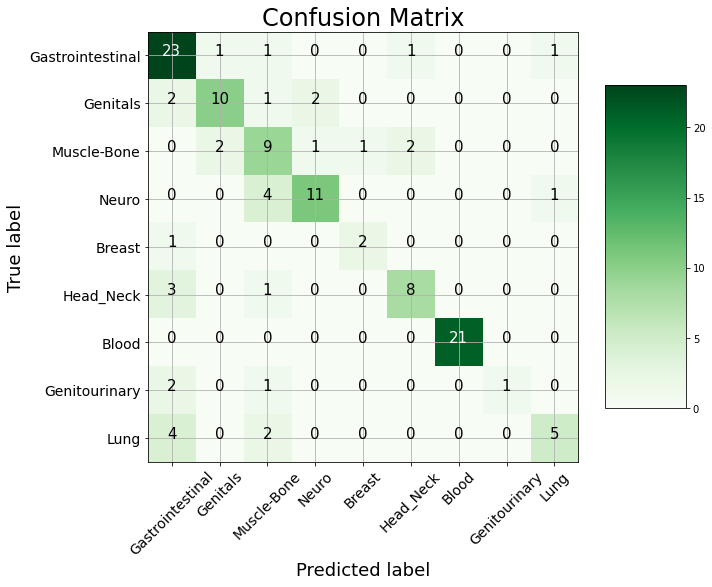

In [14]:
#Change the name of the coloumns of the class matrix created through get_dummies 
# using more meaningful names
y_test = y_test.set_axis(Cancer_Type, axis = 1)
y_pred = y_pred.set_axis(Cancer_Type, axis= 1)
y_train = y_train.set_axis(Cancer_Type, axis= 1)

y_pred = np.argmax(best_model1.predict(X_test_reshaped),axis = 1)
y_test_confusion = Test.iloc[:,17395]

cm = confusion_matrix(y_test_confusion,y_pred)
plot_confusion_matrix(cm, classes = Cancer_Type,
                        title = 'Confusion Matrix')


**Try the same but with focal loss**

![Focal loss](https://lh4.googleusercontent.com/_Zb8VyevBHbPdlPS1Bcph18b0GnRdY__yrSWaxEobHAOSq5izCVXdRS0Eo-26pU5Q8JE2daQAmFlwwUKnRiaf7JJrv7VJOLXbTOF-B6G8yshVWdBwhRXFBuMB5L6eH7KCTjzen-t7e39pxku5A)

In [15]:

def categorical_focal_loss(alpha, gamma=2.):
    """
    Softmax version of focal loss.
    When there is a skew between different categories/labels in your data set, you can try to apply this function as a
    loss.
           m
      FL = ∑  -alpha * (1 - p_o,c)^gamma * y_o,c * log(p_o,c)
          c=1
      where m = number of classes, c = class and o = observation
    Parameters:
      alpha -- the same as weighing factor in balanced cross entropy. Alpha is used to specify the weight of different
      categories/labels, the size of the array needs to be consistent with the number of classes.
      gamma -- focusing parameter for modulating factor (1-p)
    Default value:
      gamma -- 2.0 as mentioned in the paper
      alpha -- 0.25 as mentioned in the paper
    References:
        Official paper: https://arxiv.org/pdf/1708.02002.pdf
        https://www.tensorflow.org/api_docs/python/tf/keras/backend/categorical_crossentropy
    Usage:
     model.compile(loss=[categorical_focal_loss(alpha=[[.25, .25, .25]], gamma=2)], metrics=["accuracy"], optimizer=adam)
    """

    alpha = np.array(alpha, dtype=np.float32)

    def categorical_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred: A tensor resulting from a softmax
        :return: Output tensor.
        """
        y_true = tf.cast(y_true, tf.float32)
        # Clip the prediction value to prevent NaN's and Inf's
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Calculate Cross Entropy
        cross_entropy = -y_true * K.log(y_pred)

        # Calculate Focal Loss
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

        # Compute mean loss in mini_batch
        return K.mean(K.sum(loss, axis=-1))

    return categorical_focal_loss_fixed

In [16]:
model = Sequential()

#1°layer
model.add(Dense(400, input_shape=(17393,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))

#2°layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#3°layer
model.add(Dense(9))
model.add(Activation('softmax'))

#categorical_crossentropy loss per classificazione (penalizza molto le previsioni che sono sbagliate ma con alta probabilità)
model.compile(optimizer = 'adam', metrics=['accuracy'], 
    loss=[categorical_focal_loss(alpha=[.25, .25, .25, .25, .25, .25, .25, .25, .25], gamma=2)])

early_stopping_monitor = EarlyStopping(patience= 15, monitor = 'val_accuracy')

model_chekpoint_callback = ModelCheckpoint(filepath='best_model_2.hdf5',
                                           monitor = 'val_accuracy',
                                           mode = 'auto',
                                           save_best_only=True,
                                           verbose=1)

hystory = model.fit(X_train_reshaped, y_train,
         validation_data = (X_test_reshaped,y_test),
                    epochs =50,
                   callbacks = (early_stopping_monitor,model_chekpoint_callback))


Epoch 1/50


2021-12-05 22:37:19.122170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 1s 27ms/step - loss: 0.7912 - accuracy: 0.1521 - val_loss: 0.3999 - val_accuracy: 0.2177


2021-12-05 22:37:19.586231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy improved from -inf to 0.21774, saving model to best_model_2.hdf5
Epoch 2/50
15/15 [==============================] - 0s 16ms/step - loss: 0.4494 - accuracy: 0.2000 - val_loss: 0.3377 - val_accuracy: 0.4435

Epoch 00002: val_accuracy improved from 0.21774 to 0.44355, saving model to best_model_2.hdf5
Epoch 3/50
15/15 [==============================] - 0s 15ms/step - loss: 0.3532 - accuracy: 0.3208 - val_loss: 0.3199 - val_accuracy: 0.3710

Epoch 00003: val_accuracy did not improve from 0.44355
Epoch 4/50
15/15 [==============================] - 0s 15ms/step - loss: 0.3051 - accuracy: 0.4021 - val_loss: 0.3063 - val_accuracy: 0.5081

Epoch 00004: val_accuracy improved from 0.44355 to 0.50806, saving model to best_model_2.hdf5
Epoch 5/50
15/15 [==============================] - 0s 15ms/step - loss: 0.2729 - accuracy: 0.4688 - val_loss: 0.2755 - val_accuracy: 0.3790

Epoch 00005: val_accuracy did not improve from 0.50806
Epoch 6/50
15/15 [========================

In [17]:
best_model_2 = load_model('best_model_2.hdf5', compile=False)
y_pred = np.argmax(best_model_2.predict(X_test_reshaped),axis = 1)
y_pred = pd.get_dummies(y_pred)
y_pred = y_pred.T.reindex(range(9)).T.fillna(0)

2021-12-05 22:37:35.774846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


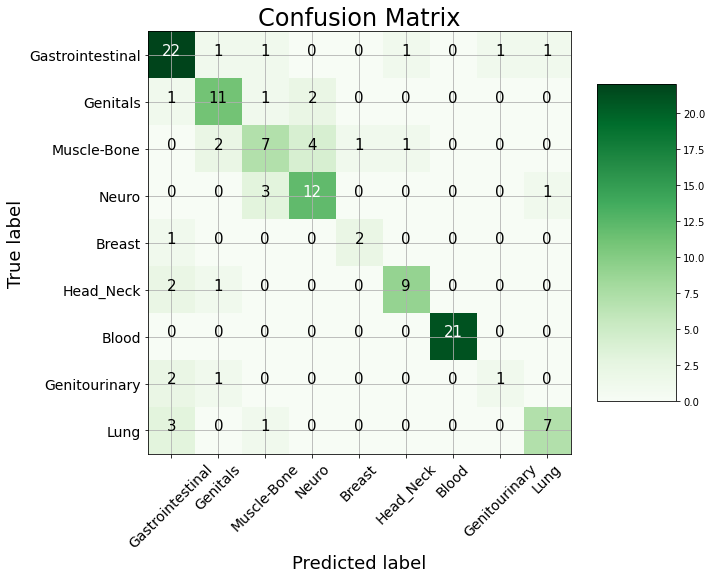

In [18]:
#Change the name of the coloumns of the class matrix created through get_dummies 
# using more meaningful names
y_test = y_test.set_axis(Cancer_Type, axis = 1)
y_pred = y_pred.set_axis(Cancer_Type, axis= 1)
y_train = y_train.set_axis(Cancer_Type, axis= 1)

y_pred = np.argmax(best_model_2.predict(X_test_reshaped),axis = 1)
y_test_confusion = Test.iloc[:,17395]

cm = confusion_matrix(y_test_confusion,y_pred)
plot_confusion_matrix(cm, classes = Cancer_Type,
                        title = 'Confusion Matrix')




**Try the same but adjust alpha paramter wrt class percentage**

In [19]:
n_obs = cm.sum(axis=1)
class_perc = n_obs/sum(n_obs)

In [20]:
model = Sequential()

#1°layer
model.add(Dense(500, input_shape=(17393,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))

#2°layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.1))

#3°layer
model.add(Dense(9))
model.add(Activation('softmax'))

#categorical_crossentropy loss per classificazione (penalizza molto le previsioni che sono sbagliate ma con alta probabilità)
model.compile(optimizer = 'adam', metrics=['accuracy'], 
    loss=[categorical_focal_loss(alpha=class_perc, gamma=2)])

early_stopping_monitor = EarlyStopping(patience= 15, monitor = 'val_accuracy')

model_chekpoint_callback = ModelCheckpoint(filepath='best_model_3.hdf5',
                                           monitor = 'val_accuracy',
                                           mode = 'auto',
                                           save_best_only=True,
                                           verbose=1)

hystory = model.fit(X_train_reshaped, y_train,
         validation_data = (X_test_reshaped,y_test),
                    epochs =50,
                   callbacks = (early_stopping_monitor,model_chekpoint_callback))


Epoch 1/50
 4/15 [=======>......................] - ETA: 0s - loss: 0.5628 - accuracy: 0.0938

2021-12-05 22:37:47.675251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 0s 21ms/step - loss: 0.4583 - accuracy: 0.1688 - val_loss: 0.2261 - val_accuracy: 0.2258

Epoch 00001: val_accuracy improved from -inf to 0.22581, saving model to best_model_3.hdf5
Epoch 2/50
 1/15 [=>............................] - ETA: 0s - loss: 0.3090 - accuracy: 0.1250

2021-12-05 22:37:48.010795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 0s 15ms/step - loss: 0.2146 - accuracy: 0.2167 - val_loss: 0.1557 - val_accuracy: 0.3790

Epoch 00002: val_accuracy improved from 0.22581 to 0.37903, saving model to best_model_3.hdf5
Epoch 3/50
15/15 [==============================] - 0s 15ms/step - loss: 0.1685 - accuracy: 0.2938 - val_loss: 0.1472 - val_accuracy: 0.3387

Epoch 00003: val_accuracy did not improve from 0.37903
Epoch 4/50
15/15 [==============================] - 0s 15ms/step - loss: 0.1320 - accuracy: 0.3917 - val_loss: 0.1292 - val_accuracy: 0.5161

Epoch 00004: val_accuracy improved from 0.37903 to 0.51613, saving model to best_model_3.hdf5
Epoch 5/50
15/15 [==============================] - 0s 15ms/step - loss: 0.1011 - accuracy: 0.5208 - val_loss: 0.1112 - val_accuracy: 0.5242

Epoch 00005: val_accuracy improved from 0.51613 to 0.52419, saving model to best_model_3.hdf5
Epoch 6/50
15/15 [==============================] - 0s 15ms/step - loss: 0.0873 - accuracy: 0.5604 - val_l

In [21]:
best_model_3 = load_model('best_model_3.hdf5', compile=False)
y_pred = np.argmax(best_model_3.predict(X_test_reshaped),axis = 1)
y_pred = pd.get_dummies(y_pred)
y_pred = y_pred.T.reindex(range(9)).T.fillna(0)

2021-12-05 22:38:13.911962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


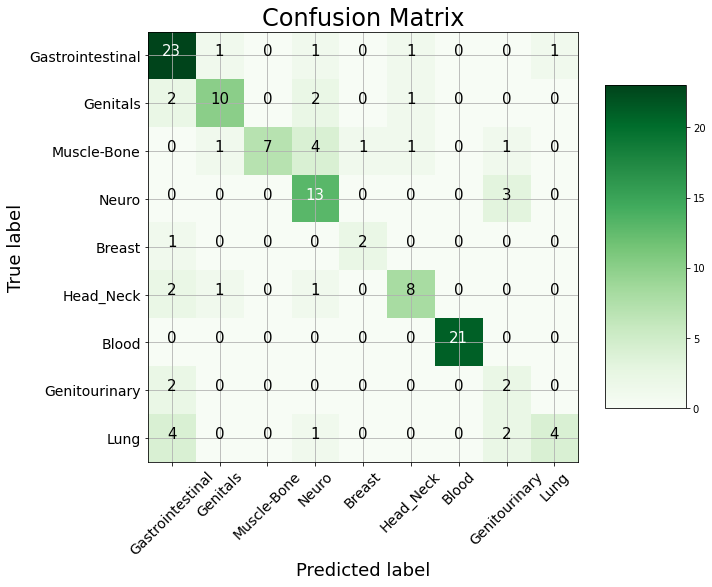

In [22]:
#Change the name of the coloumns of the class matrix created through get_dummies 
# using more meaningful names
y_test = y_test.set_axis(Cancer_Type, axis = 1)
y_pred = y_pred.set_axis(Cancer_Type, axis= 1)
y_train = y_train.set_axis(Cancer_Type, axis= 1)

y_pred = np.argmax(best_model_3.predict(X_test_reshaped),axis = 1)
y_test_confusion = Test.iloc[:,17395]

cm = confusion_matrix(y_test_confusion,y_pred)
plot_confusion_matrix(cm, classes = Cancer_Type,
                        title = 'Confusion Matrix')




No change at all :(